In [190]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [191]:
df=pd.read_csv('attritionanalysis.csv')

In [192]:
df1=df[['Employee_ID','Retain_Indicator','Sex_Indicator','Marital_Status','Relocation_Indicator']]

In [193]:
df1.head()

,Employee_ID,Retain_Indicator,Sex_Indicator,Marital_Status,Relocation_Indicator
0,1,0,1,1,1
1,2,0,0,1,0
2,3,1,1,0,0
3,4,0,1,1,0
4,5,1,1,0,1


In [194]:
df1.describe()

,Employee_ID,Retain_Indicator,Sex_Indicator,Marital_Status,Relocation_Indicator
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,0.560000,0.560000,0.420000,0.480000
std,14.57738,0.501427,0.501427,0.498569,0.504672
min,1.00000,0.000000,0.000000,0.000000,0.000000
25%,13.25000,0.000000,0.000000,0.000000,0.000000
50%,25.50000,1.000000,1.000000,0.000000,0.000000
75%,37.75000,1.000000,1.000000,1.000000,1.000000
max,50.00000,1.000000,1.000000,1.000000,1.000000


In [195]:
df1.shape

(50, 5)

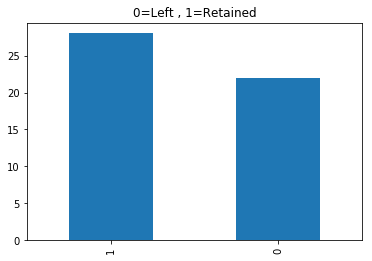

In [196]:
df1.Retain_Indicator.value_counts().plot(kind="bar")
plt.title("0=Left , 1=Retained")
plt.show()

In [197]:
pf1=df1.groupby('Retain_Indicator').agg([np.size,np.mean])

In [198]:
pf1

Employee_ID            Sex_Indicator            \
                        size       mean          size      mean   
Retain_Indicator                                                  
0                         22  20.772727            22  0.500000   
1                         28  29.214286            28  0.607143   

                 Marital_Status           Relocation_Indicator            
                           size      mean                 size      mean  
Retain_Indicator                                                          
0                            22  0.500000                   22  0.409091  
1                            28  0.357143                   28  0.535714

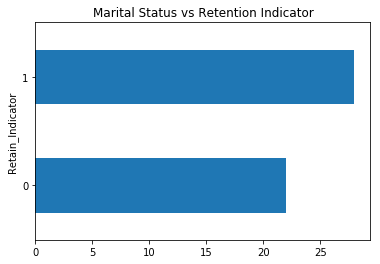

In [199]:
pf1['Marital_Status']['size'].plot(kind='barh')
plt.title('Marital Status vs Retention Indicator')
plt.show()

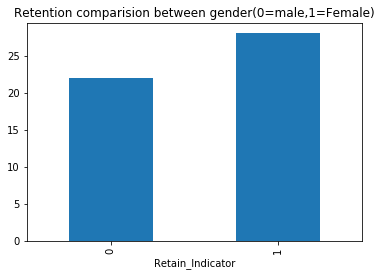

In [200]:
pf1['Sex_Indicator']['size'].plot(kind='bar')
plt.title("Retention comparision between gender(0=male,1=Female)")
plt.show()

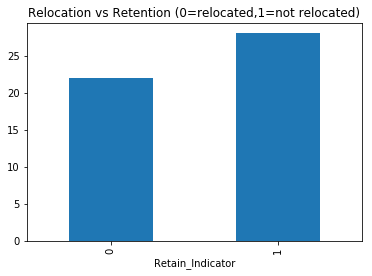

In [201]:
pf1['Relocation_Indicator']['size'].plot(kind="bar")
plt.title("Relocation vs Retention (0=relocated,1=not relocated)")
plt.show()

In [202]:
from sklearn.cross_validation import train_test_split

In [203]:
x_train = df1.sample(frac=0.85,random_state=1)

In [204]:
x_test=df1.loc[~df1.index.isin(x_train.index)]

In [205]:
y_train=x_train['Retain_Indicator']

In [206]:
y_test=x_test['Retain_Indicator']

In [207]:
x_test=x_test.drop('Retain_Indicator',axis=1)

In [208]:
x_train=x_train.drop('Retain_Indicator',axis=1)

In [209]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(42, 4)
(8, 4)
(42,)
(8,)


In [210]:
from sklearn.linear_model import LogisticRegression

In [211]:
model=LogisticRegression()

In [212]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [213]:
predict=model.predict(x_test)

In [214]:
predict

array([0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [215]:
from sklearn import metrics

In [216]:
print (metrics.accuracy_score(y_test,predict)*100)

62.5


In [217]:
##When we train the model for 85% of data (42 rows) we get an accuracy of 62.5 percent, let's try for more training data

In [218]:
x1_train=df1[['Employee_ID','Marital_Status','Relocation_Indicator','Sex_Indicator','Retain_Indicator']]

In [219]:
xtrain = x1_train.sample(frac=0.95,random_state=1)

In [220]:
xtest=x1_train.loc[~x1_train.index.isin(xtrain.index)]

In [221]:
ytrain=xtrain['Retain_Indicator']

In [222]:
ytest=xtest['Retain_Indicator']

In [223]:
xtrain=xtrain.drop('Retain_Indicator',axis=1)
xtest=xtest.drop('Retain_Indicator',axis=1)

In [224]:
model.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [225]:
predict2=model.predict(xtest)

In [226]:
predict2

array([1, 1], dtype=int64)

In [227]:
print (metrics.accuracy_score(ytest,predict2)*100)

100.0
